<a href="https://colab.research.google.com/github/Mahdi-Miri/Signal_Proccesing/blob/main/Signal_Proccesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Correlations

###Auto-Correlation

In [1]:
#Pitch Detection In Audio Signals

In [3]:
#Install and Importing libraries


In [6]:
!pip install numpy scipy matplotlib requests

In [6]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import requests
import io
from scipy.signal import find_peaks

In [13]:
# Generate the Audio Signal

# Parameters for the signal
sample_rate = 44100      # Standard sample rate for audio (samples per second)
frequency = 440          # Frequency of the sine wave in Hz (A4 note)
duration = 1.0           # Duration of the signal in seconds

print(f"Generating a synthetic signal with frequency: {frequency} Hz")

# Create a time array from 0 to 'duration' with 'sample_rate' points per second
# This represents the time axis for our signal
t = np.linspace(0., duration, int(sample_rate * duration), endpoint=False)

# Generate the sine wave signal
# The formula for a sine wave is A * sin(2 * pi * f * t)
# We use a simple amplitude of 1.0
data = np.sin(2 * np.pi * frequency * t)

print("Signal generated successfully.")

# Select a small segment of the signal for analysis (e.g., 50ms)
# This is the same process as before
segment_length = int(0.05 * sample_rate)
signal_segment = data[:segment_length]

Generating a synthetic signal with frequency: 440 Hz
Signal generated successfully.


In [14]:
# Compute the autocorrelation using np.correlate
autocorr = np.correlate(signal_segment, signal_segment, mode='full')
# We only need the second half (positive lags)
autocorr = autocorr[len(autocorr)//2:]

In [15]:
# Find all peaks in the autocorrelation function
peaks, _ = find_peaks(autocorr, height=0.1 * np.max(autocorr))

if len(peaks) > 0:
    # The first peak corresponds to the fundamental period
    fundamental_period_samples = peaks[0]

    # Calculate the fundamental frequency (Pitch)
    fundamental_frequency = sample_rate / fundamental_period_samples

    print(f"\nSample Rate: {sample_rate} Hz")
    print(f"Detected Peak Lag: {fundamental_period_samples} samples")
    print(f"Estimated Fundamental Frequency (Pitch): {fundamental_frequency:.2f} Hz")
else:
    print("Could not determine the fundamental frequency.")


Sample Rate: 44100 Hz
Detected Peak Lag: 100 samples
Estimated Fundamental Frequency (Pitch): 441.00 Hz


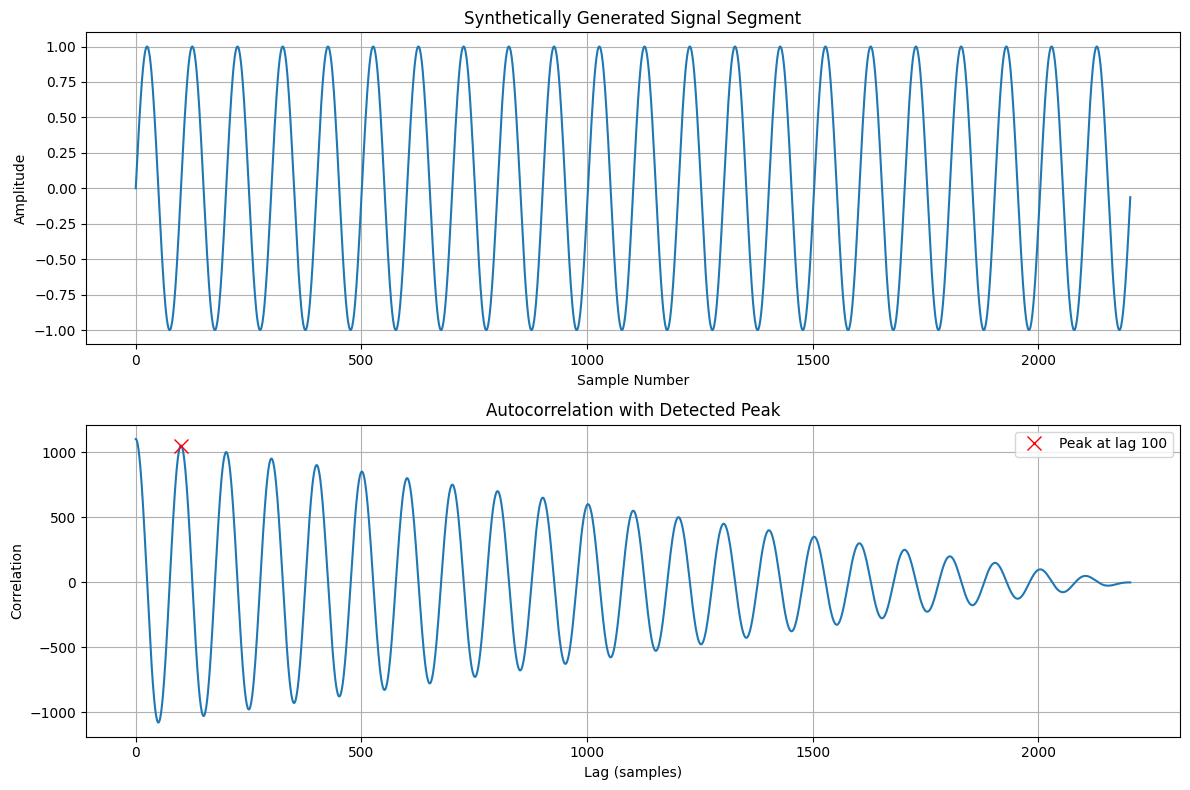

In [16]:
# Plot the signal segment
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
plt.title("Synthetically Generated Signal Segment")
plt.plot(signal_segment)
plt.xlabel("Sample Number")
plt.ylabel("Amplitude")
plt.grid(True)

# Plot the autocorrelation and the detected peak
plt.subplot(2, 1, 2)
plt.title("Autocorrelation with Detected Peak")
plt.plot(autocorr)
if len(peaks) > 0:
    plt.plot(peaks[0], autocorr[peaks[0]], "x", color='red', markersize=10, label=f'Peak at lag {peaks[0]}')
plt.xlabel("Lag (samples)")
plt.ylabel("Correlation")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
#Frequency=  Sample Rate / Period in Samples  -> 44100 / 100 = 441.0HZ


###Cross-Correlation
